<a href="https://colab.research.google.com/github/AbeHandler/AbeHandler.github.io/blob/master/Eric_April12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import json
import enum


with open('tmp.jsonl', 'r') as f:
  lines = f.readlines()

data = [json.loads(line) for line in lines]
df = pd.DataFrame(data)
df = df[df["number"].apply(lambda x: len(x) > 0)]

df["position"] = df["CamZ"].apply(lambda x: round(float(x)))

class Position(enum.Enum):
    RIGHT = 5
    CENTER = 0
    LEFT = -5

df["position"] = df["CamZ"].apply(lambda x: Position(round(float(x))).name)

df["number"] = df["number"].apply(lambda x: float(x))
df["Lvar"] = df["Lvar"].apply(lambda x: float(x))
df["Rvar"] = df["Rvar"].apply(lambda x: float(x))
df["Cleveland"] = df.index > 90
df["larger"] = df[["Lvar", "Rvar"]].max(axis=1)
df["smaller"] = df[["Lvar", "Rvar"]].min(axis=1)
df["data_pct"] = (df["smaller"] / df["larger"]) * 100
df = df.drop("larger", axis=1)
df = df.drop("smaller", axis=1)


### Cleveland analysis

In [105]:
dfC = df[df["Cleveland"]].copy()
dfC["bias"] = dfC["number"] - dfC["data_pct"]
dfC['right_bigger'] = (dfC['Rvar'] > dfC['Lvar'])
dfC['sideSmall'] = (dfC['right_bigger'] & (dfC['position'] == 'LEFT')) | (~dfC['right_bigger'] & (dfC['position'] == 'RIGHT'))
dfC = dfC[dfC["position"] != "CENTER"]

In [108]:
dfC.groupby('sideSmall').mean('bias').reset_index()

,sideSmall,Lvar,Rvar,number,Cleveland,data_pct,bias,right_bigger
0,False,0.300252,0.233408,57.307692,1.0,63.760391,-6.452699,0.230769
1,True,0.339191,0.296579,66.057143,1.0,57.407805,8.649338,0.400000


### Absolute analysis


In [125]:
dfnC = df[~df["Cleveland"]].copy()
dfnC["number"] = dfnC["number"].apply(lambda x: int(x))
dfnC['Lvar'] = dfnC['Lvar'].apply(lambda x: x * 100)
dfnC["ncbias"] = dfnC["number"] - dfnC['Lvar']
dfnC["error"] = dfnC["number"] - dfnC['Lvar']
dfnC["error"] = dfnC["error"].abs()
dfnC.groupby('position')['error'].mean()

position
CENTER    10.915307
LEFT       7.374110
RIGHT      8.040729
Name: error, dtype: float64

<Axes: xlabel='position', ylabel='error'>

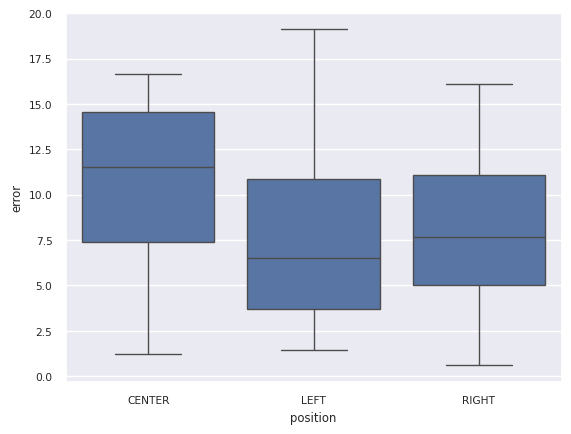

In [126]:
# prompt: make box plot with seaborne of dfnC error by position

import seaborn as sns

sns.boxplot(x="position", y="error", data=dfnC)
